In [39]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import square
import math
from numpy.fft import fft, ifft, fftfreq
import time

Text(0, 0.5, 'Амплитуда')

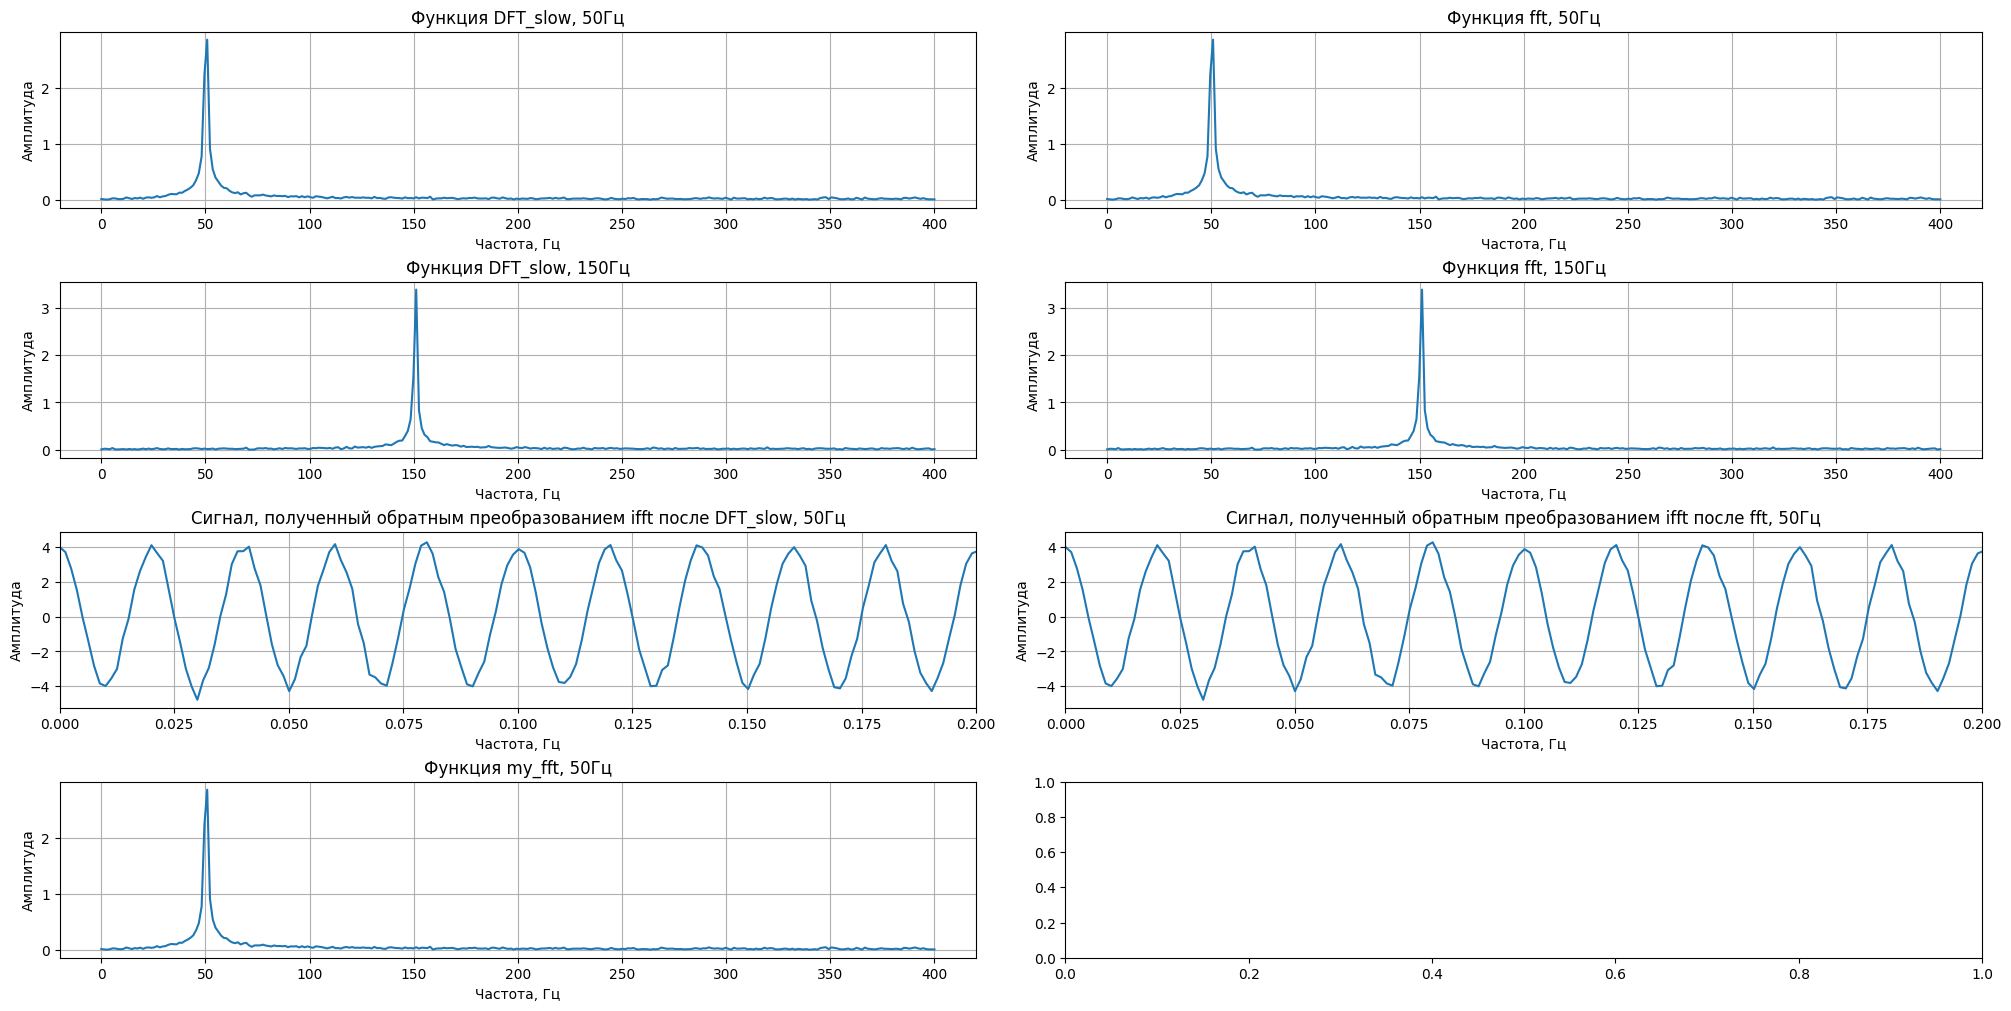

In [40]:
def cosinus(t, frequency, amplitude):
    w = frequency * 2 * np.pi
    return np.cos(w * t) * amplitude

def DFT_slow(t):
    """Compute the discrete Fourier Transform of the 1D array x"""
    t = np.asarray(t, dtype=float)
    N = t.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, t)

def my_fft(signal):
    n = len(signal)
    if n <= 1:
        return signal
    even = fft(signal[0::2])
    odd = fft(signal[1::2])
    t = [np.exp(-2j * np.pi * k / n) * odd[k] for k in range(n // 2)]
    return np.concatenate([even + t, even - t])

def gauss_noise(signal):
    return signal + np.random.standard_normal(signal.shape) / 5

N = 600 # Количество отсчетов
fmax = 800 # максимальная частота
T = 1.0 / fmax
A = 4

x = np.linspace(0.0, N * T, N)
y_50 = gauss_noise(cosinus(x, frequency=50, amplitude=A))
y_150 = gauss_noise(cosinus(x, frequency=150, amplitude=A))

y_50_my_fft = my_fft(y_50)

y_50_dft_slow = DFT_slow(y_50)
y_150_dft_slow = DFT_slow(y_150)
'''
xf - это массив, который будет содержать значения частот.
0.0 - это начальное значение частоты, которое соответствует нулевой частоте (постоянной составляющей) в спектре.
fmax / 2 - это конечное значение частоты, исходя из того, что спектр частоты ограничен половиной частоты Найквиста. 
Это значение соответствует максимальной частоте, которую можно адекватно представить в спектре.
N // 2 - это количество точек, которое надо создать в массиве xf. В данном случае, оно равно половине общего числа отсчетов N, 
потому что спектр симметричен относительно нулевой частоты и обычно интересует только положительная половина спектра.
Таким образом, xf содержит частоты от 0 до fmax / 2, которые используются для построения амплитудного спектра сигнала.
'''
xf = np.linspace(0.0, fmax / 2, N // 2)

y_50_fft = fft(y_50)
y_150_fft = fft(y_150)

inv_dft_slow = ifft(y_50_dft_slow)
inv_fft = ifft(y_50_fft)

fig, axs = plt.subplots(4, 2, figsize=(20, 10), layout="constrained")

# Функция DFT_slow, 50Гц"
axs[0, 0].plot(xf, 2.0 / N * np.abs(y_50_dft_slow[0:N // 2]))
axs[0, 0].grid()
axs[0, 0].set_title("Функция DFT_slow, 50Гц")
axs[0, 0].set_xlabel('Частота, Гц')
axs[0, 0].set_ylabel('Амплитуда')

# Функция fft, 50Гц
axs[0, 1].plot(xf, 2.0 / N * np.abs(y_50_fft[0:N // 2]))
axs[0, 1].grid()
axs[0, 1].set_title("Функция fft, 50Гц")
axs[0, 1].set_xlabel('Частота, Гц')
axs[0, 1].set_ylabel('Амплитуда')

# Функция DFT_slow, 150Гц
axs[1, 0].plot(xf, 2.0 / N * np.abs(y_150_dft_slow[0:N // 2]))
axs[1, 0].grid()
axs[1, 0].set_title("Функция DFT_slow, 150Гц")
axs[1, 0].set_xlabel('Частота, Гц')
axs[1, 0].set_ylabel('Амплитуда')

# Функция fft, 150Гц
axs[1, 1].plot(xf, 2.0 / N * np.abs(y_150_fft[0:N // 2]))
axs[1, 1].grid()
axs[1, 1].set_title("Функция fft, 150Гц")
axs[1, 1].set_xlabel('Частота, Гц')
axs[1, 1].set_ylabel('Амплитуда')

# Обратное преобразование после DFT_slow, 50Гц
axs[2, 0].plot(x, inv_dft_slow)
axs[2, 0].grid()
axs[2, 0].set_xlim(0, 0.2)
axs[2, 0].set_title("Сигнал, полученный обратным преобразованием ifft после DFT_slow, 50Гц")
axs[2, 0].set_xlabel('Частота, Гц')
axs[2, 0].set_ylabel('Амплитуда')

# Обратное преобразовнаие после fft, 50Гц
axs[2, 1].plot(x, inv_fft)
axs[2, 1].grid()
axs[2, 1].set_xlim(0, 0.2)
axs[2, 1].set_title("Сигнал, полученный обратным преобразованием ifft после fft, 50Гц")
axs[2, 1].set_xlabel('Частота, Гц')
axs[2, 1].set_ylabel('Амплитуда')

# Функция my_fft, 50Гц"
axs[3, 0].plot(xf, 2.0 / N * np.abs(y_50_my_fft[0:N // 2]))
axs[3, 0].grid()
axs[3, 0].set_title("Функция my_fft, 50Гц")
axs[3, 0].set_xlabel('Частота, Гц')
axs[3, 0].set_ylabel('Амплитуда')

In [41]:
print("my_fft run time:")
%timeit my_fft(y)
print("DFT_slow run time:")
%timeit DFT_slow(y)
print("fft run time:")
%timeit fft(y)

my_fft run time:
835 µs ± 51.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
DFT_slow run time:
33.5 ms ± 631 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
fft run time:
7.99 µs ± 966 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Text(0.5, 0, 'Время, с')

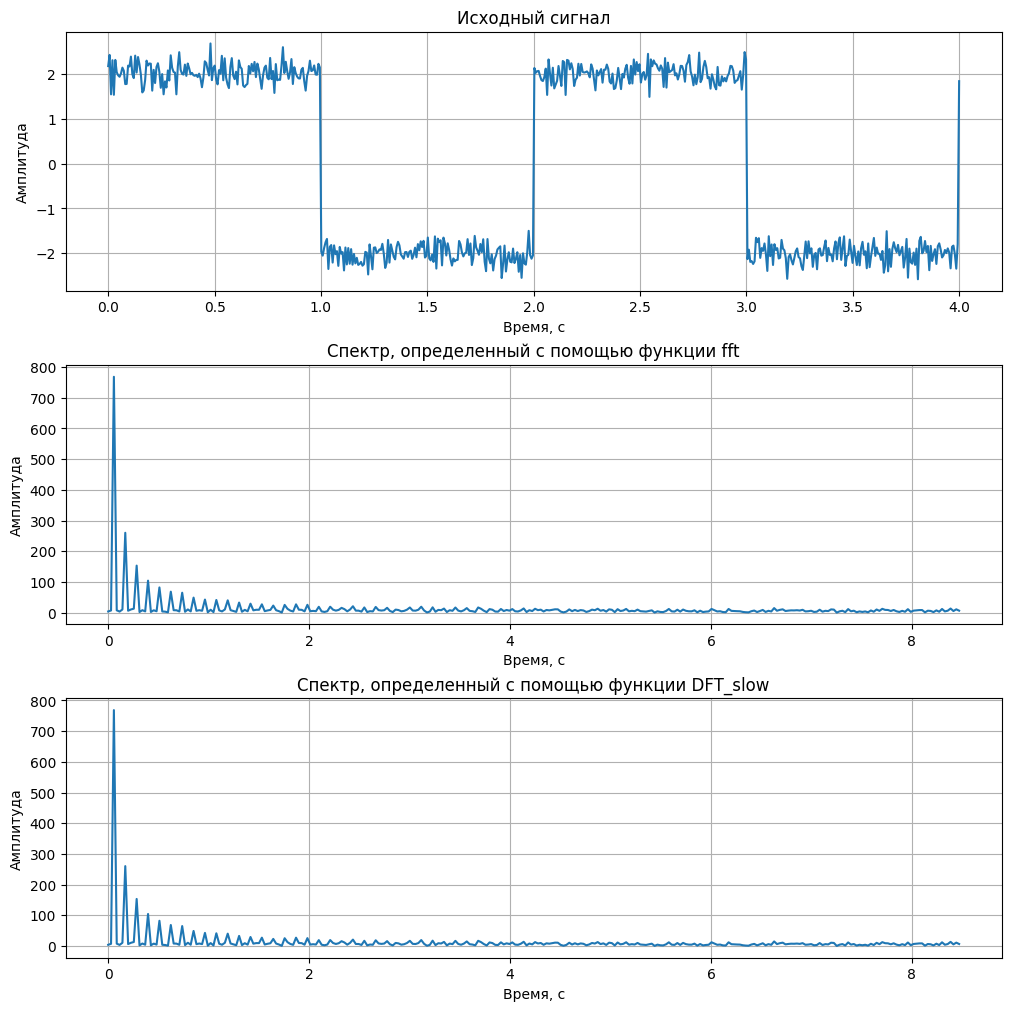

In [42]:
def rectangle_signal(t, period, amplitude):
    return square(2 * np.pi * t / period) * amplitude

T = 2
A = 2
N = 600

row = np.linspace(0, 4, N)

y = gauss_noise(rectangle_signal(row, period=T, amplitude=A))
y_fft = fft(y)
y_dft_slow = DFT_slow(y)

fmax = np.max(y_fft)
xf = np.linspace(0.0, fmax / 2, N // 2)

fig, axs = plt.subplots(3, 1, figsize=(10, 10), layout="constrained")

axs[0].plot(row, y)
axs[0].grid()
axs[0].set_title("Исходный сигнал")
axs[0].set_ylabel("Амплитуда")
axs[0].set_xlabel("Время, с")

axs[1].plot(xf, np.abs(y_fft[0: N // 2]))
axs[1].grid()
axs[1].set_title("Спектр, определенный с помощью функции fft")
axs[1].set_ylabel("Амплитуда")
axs[1].set_xlabel("Время, с")

axs[2].plot(xf, np.abs(y_dft_slow[0: N // 2]))
axs[2].grid()
axs[2].set_title("Спектр, определенный с помощью функции DFT_slow")
axs[2].set_ylabel("Амплитуда")
axs[2].set_xlabel("Время, с")
